## ML Project

We start by importing all the required libraries

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [234]:
df = pd.read_csv("social_media_vs_productivity.csv")
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


### Basic Analysis of Dataset

In [235]:
# data on all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [236]:
# statistics of all features
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


### Checking for null values

In [237]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [238]:
# FIXME: stress_level is categorical. Check for numeric discrete columns and fill them with mode.

In [239]:
num_cols = ['daily_social_media_time', 'perceived_productivity_score', 'actual_productivity_score', 'sleep_hours', 'screen_time_before_sleep', 'job_satisfaction_score']

# Fill numerical columns with mean
for col in num_cols:
    mean_val = df[col].mean()  # calculate mean
    df[col].fillna(mean_val, inplace=True)

# Categorical columns to be filled with mode
cat_cols = ['stress_level']

for col in cat_cols:
    mode_val = df[col].mode()[0]  # calculate mode
    df[col].fillna(mode_val, inplace=True)

print(df.isnull().sum())

age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64


/tmp/ipykernel_6776/2171571539.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)
/tmp/ipykernel_6776/2171571539.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [240]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,4.964901
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


### Checking existence of duplicates:

In [241]:
df = df.drop_duplicates()
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,4.964901
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [242]:
print(df.head())
print(df.isnull().sum())

   age  gender    job_type  daily_social_media_time  \
0   56    Male  Unemployed                 4.180940   
1   46    Male      Health                 3.249603   
2   32    Male     Finance                 3.113418   
3   60  Female  Unemployed                 3.113418   
4   25    Male          IT                 3.113418   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                       61            6.753558   
1                    Twitter                       59            9.169296   
2                    Twitter                       57            7.910952   
3                   Facebook                       59            6.355027   
4                   Telegram                       66            6.214096   

   perceived_productivity_score  actual_productivity_score  stress_level  \
0                      8.040464                   7.291555           4.0   
1                      5.063368                   5.16

### Outlier Detection and Removal

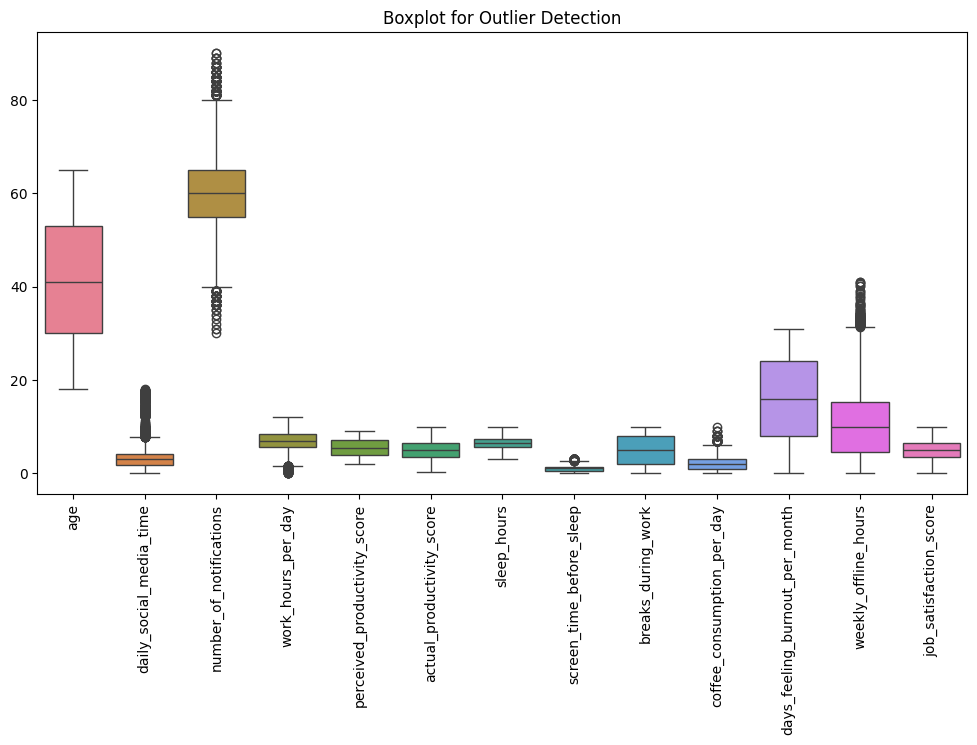

In [243]:
plt.figure(figsize=(12,6))
cols = ['age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'actual_productivity_score', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score']
sns.boxplot(data=df[cols])
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

We notice a few outliers in the boxplot. Capping can be done to ensure the outliers do not affect the model.

We also notice that the ranges of some features are quite large compared to others. Standardization can be done later to make sure all features lie between -1 and 1.

In [244]:
## Capping outliers based on IQR for numerical columns
# for column in df.columns:
#     if column != 'stress_level':
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_cap = Q1 - 1.5 * IQR
#         upper_cap = Q3 + 1.5 * IQR
#         df[column] = np.where(df[column] < lower_cap, int(lower_cap), df[column])
#         df[column] = np.where(df[column] > upper_cap, int(upper_cap), df[column])

# print("\nSummary of data after capping outliers:")
# df.describe()

# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('stress_level')  

# Capping outliers
for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])

print("\nSummary of numeric data after capping outliers:")
print(df[num_cols].describe())



Summary of numeric data after capping outliers:
                age  daily_social_media_time  number_of_notifications  \
count  30000.000000             30000.000000             30000.000000   
mean      41.486867                 3.074948                59.946667   
std       13.835221                 1.810313                 7.647695   
min       18.000000                 0.000000                40.000000   
25%       30.000000                 1.797748                55.000000   
50%       41.000000                 3.113418                60.000000   
75%       53.000000                 4.219533                65.000000   
max       65.000000                 7.852210                80.000000   

       work_hours_per_day  perceived_productivity_score  \
count        30000.000000                  30000.000000   
mean             6.992487                      5.510488   
std              1.992752                      1.968285   
min              1.577341                      2.000252  

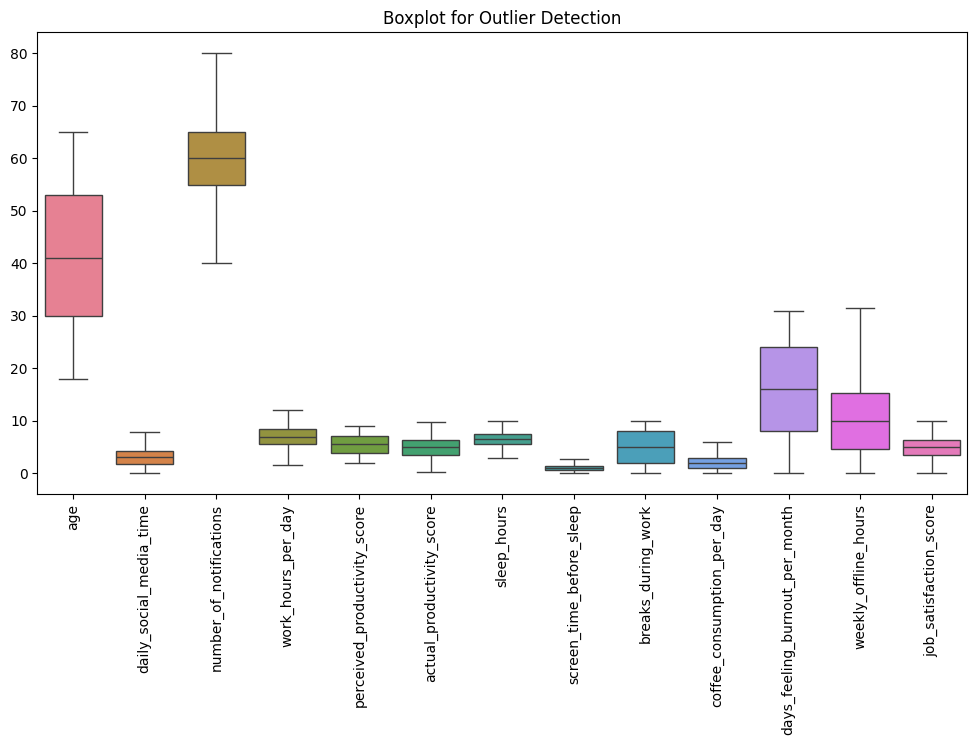

In [245]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols])
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

### Exploratory Data Analysis

#### Univariate Analysis

#### Numerical Features

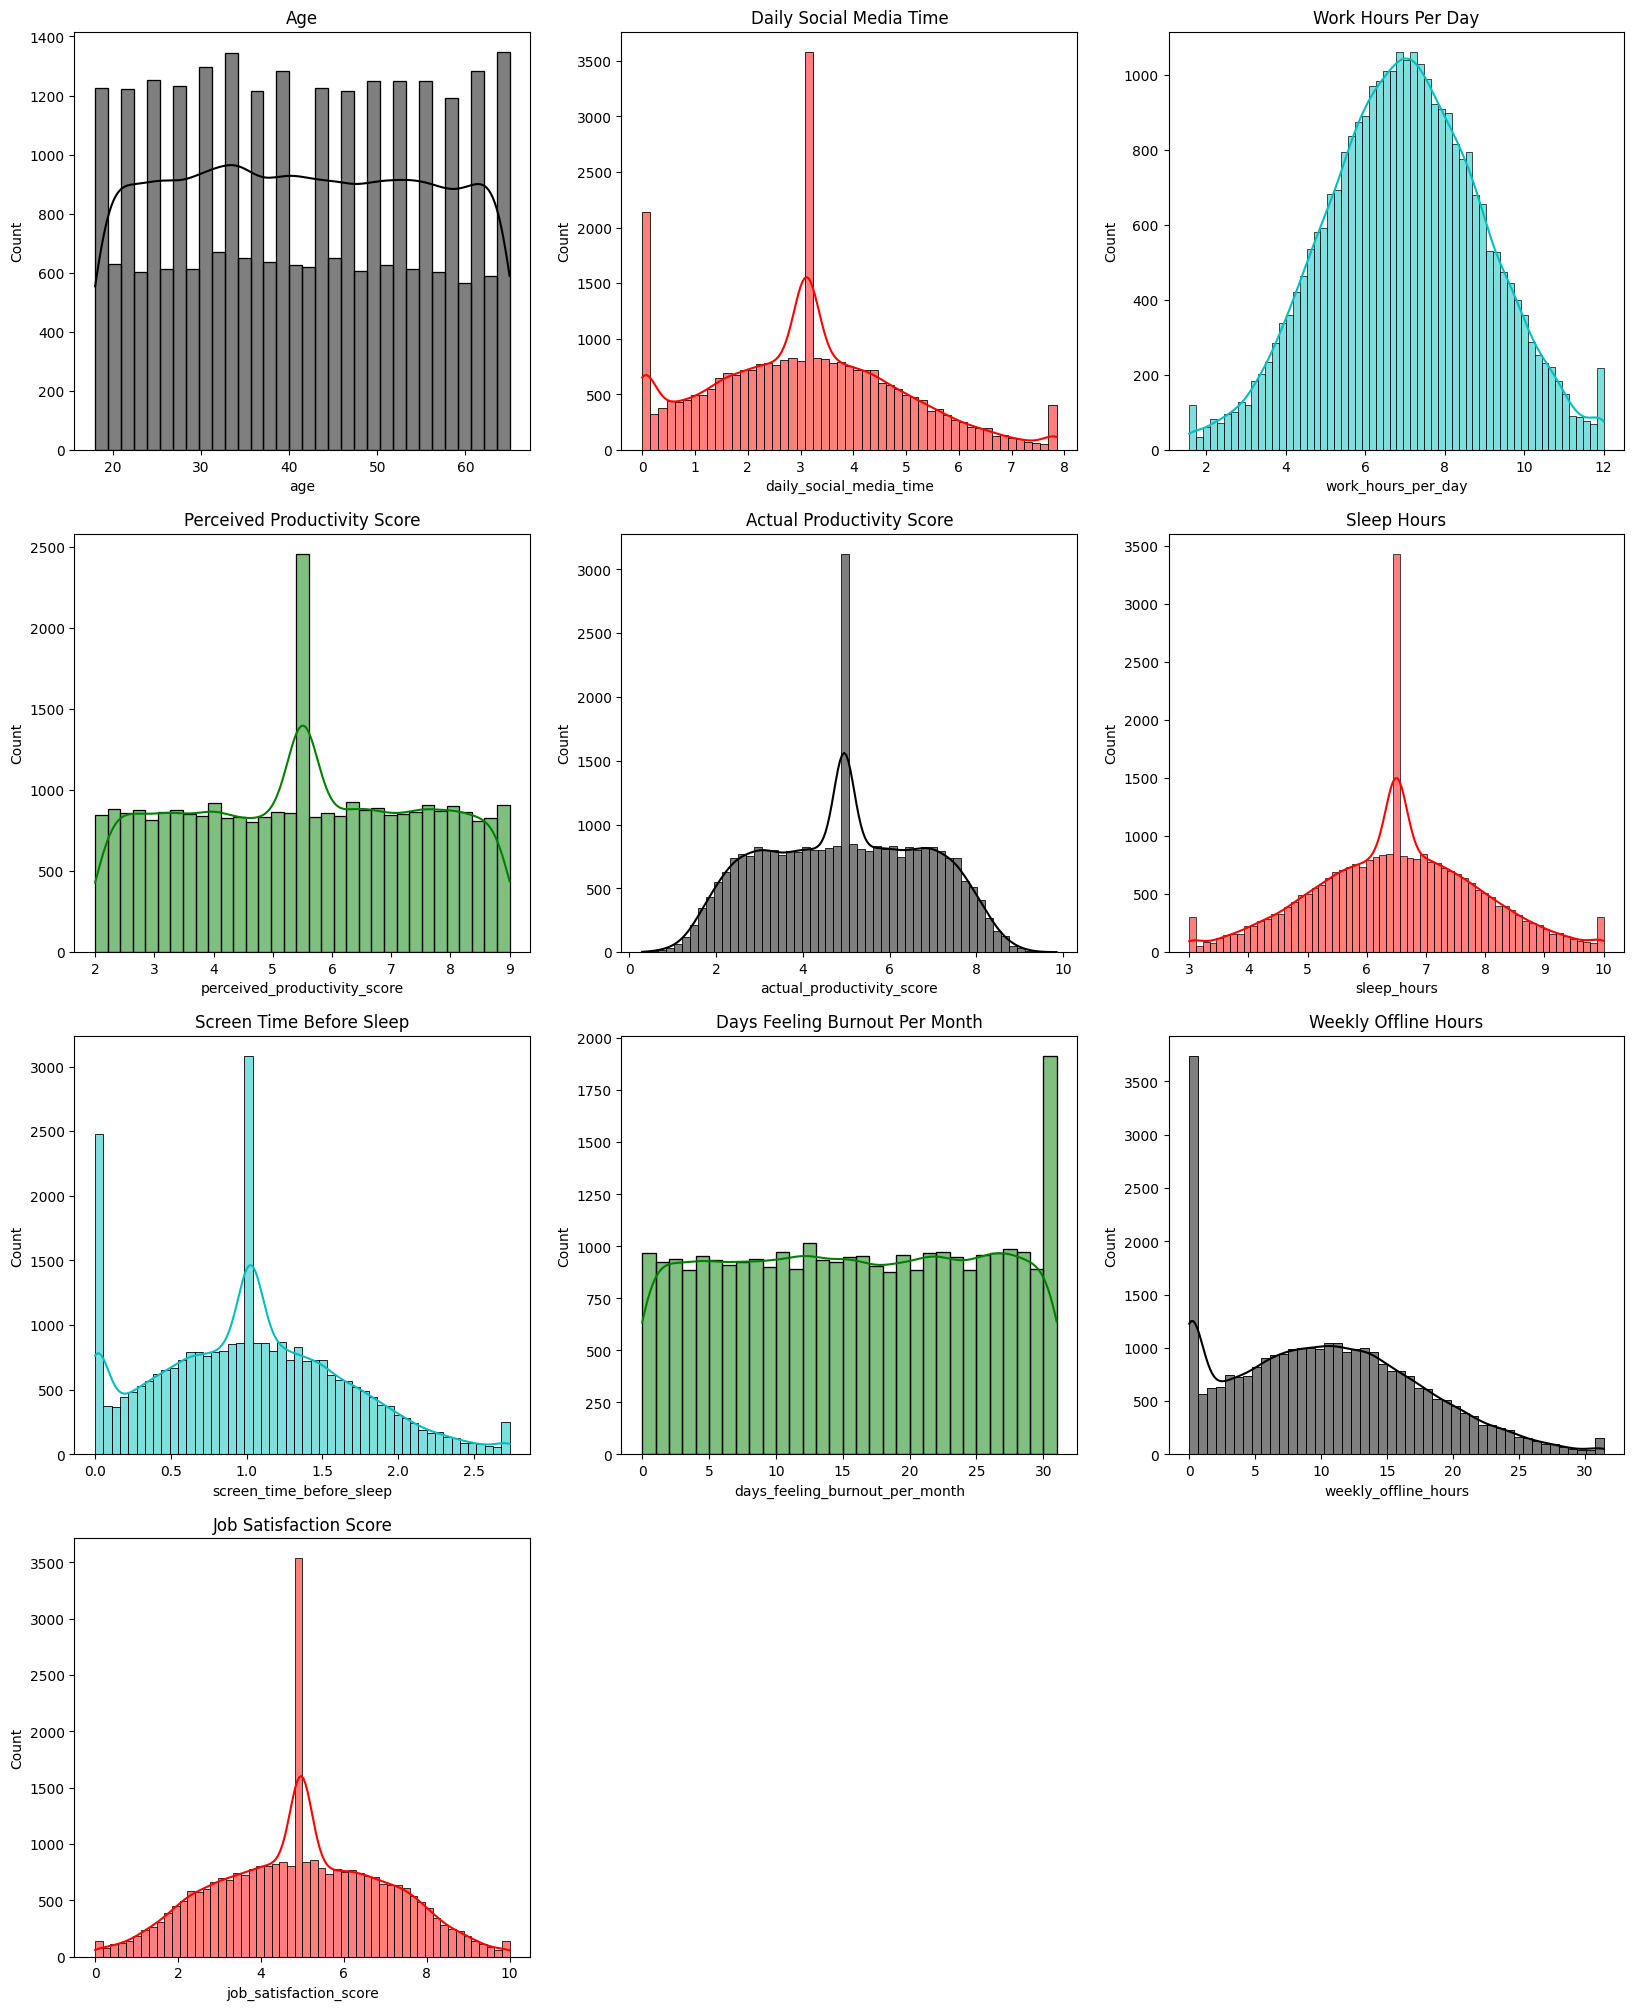

In [246]:
colors = ['k', 'r', 'c', 'g']
num_cols = ['age', 'daily_social_media_time', 'work_hours_per_day', 'perceived_productivity_score', 'actual_productivity_score', 'sleep_hours', 'screen_time_before_sleep', 'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score']
plt.figure(figsize=(20, 25))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    plt.title(' '.join(col.split('_')).title())
    sns.histplot(df[col], kde=True, color=colors[i % len(colors)])
plt.show()

#### Categorical Features

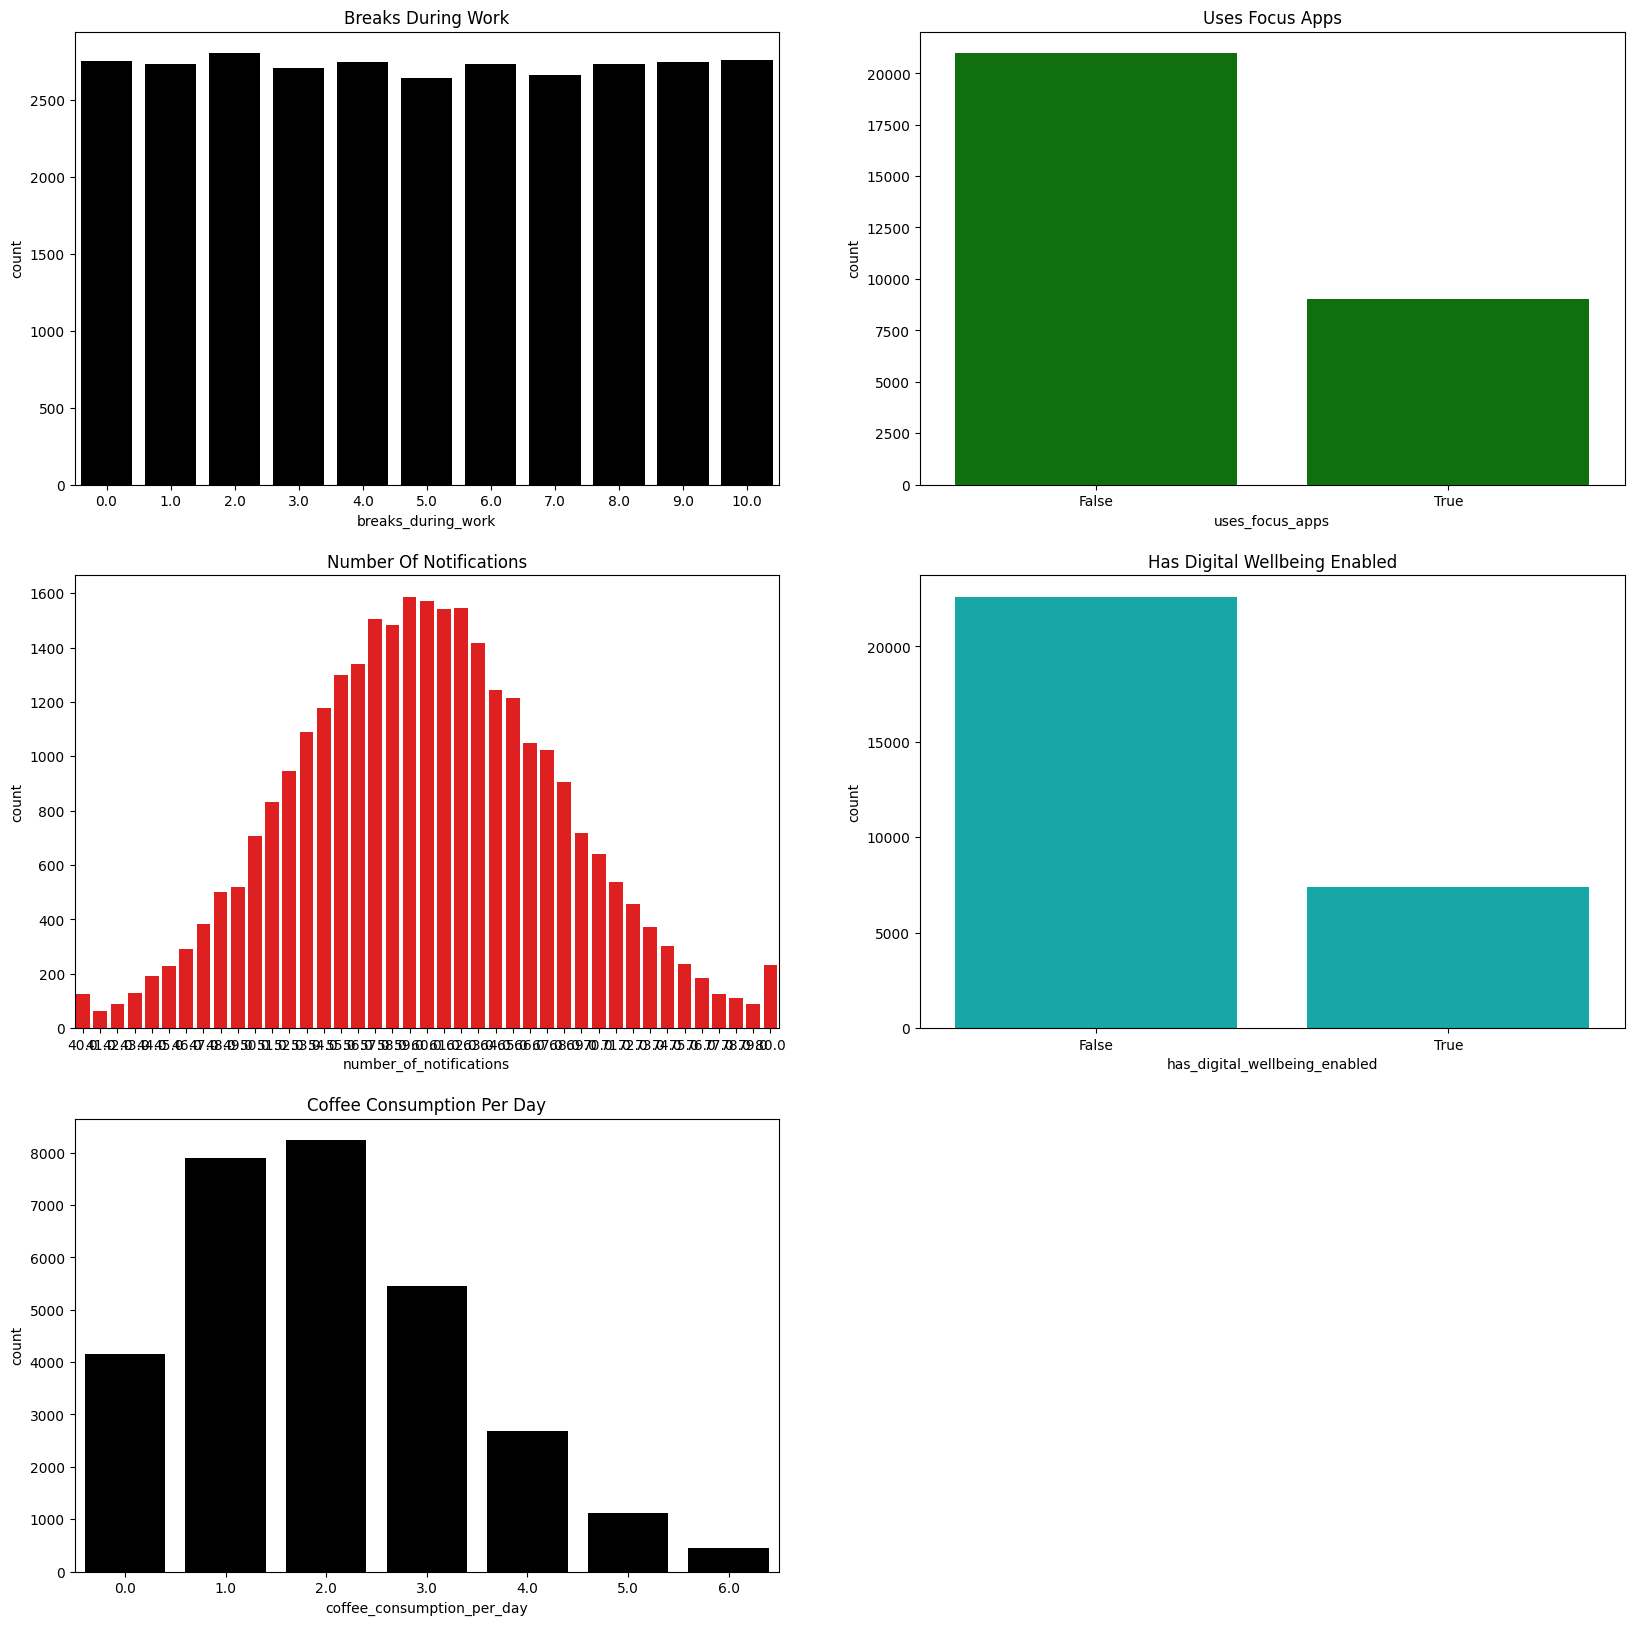

In [247]:
colors = ['k', 'g', 'r', 'c']
cat_cols = ['breaks_during_work', 'uses_focus_apps', 'number_of_notifications', 'has_digital_wellbeing_enabled', 'coffee_consumption_per_day']
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i + 1)
    plt.title(' '.join(col.split('_')).title())
    sns.countplot(x=df[col], color=colors[i % len(colors)])
plt.show()

##### Distribution of classes of Target

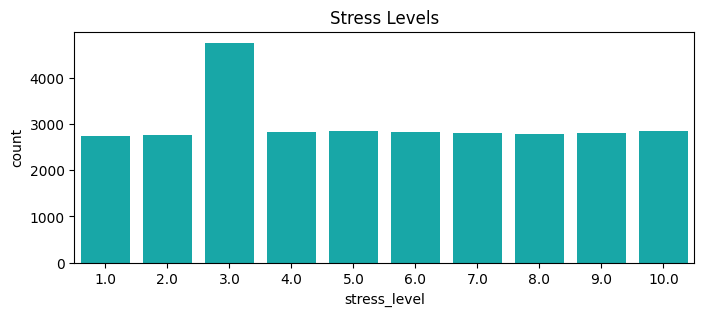

In [248]:
plt.figure(figsize=(8, 3))
sns.countplot(x=df['stress_level'], color='c')
plt.title('Stress Levels')
plt.show()

The dataset is slightly imbalanced because of the large number of data points in class 3 compared to the others.

#### Bivariate Analysis

#### Numerical Features

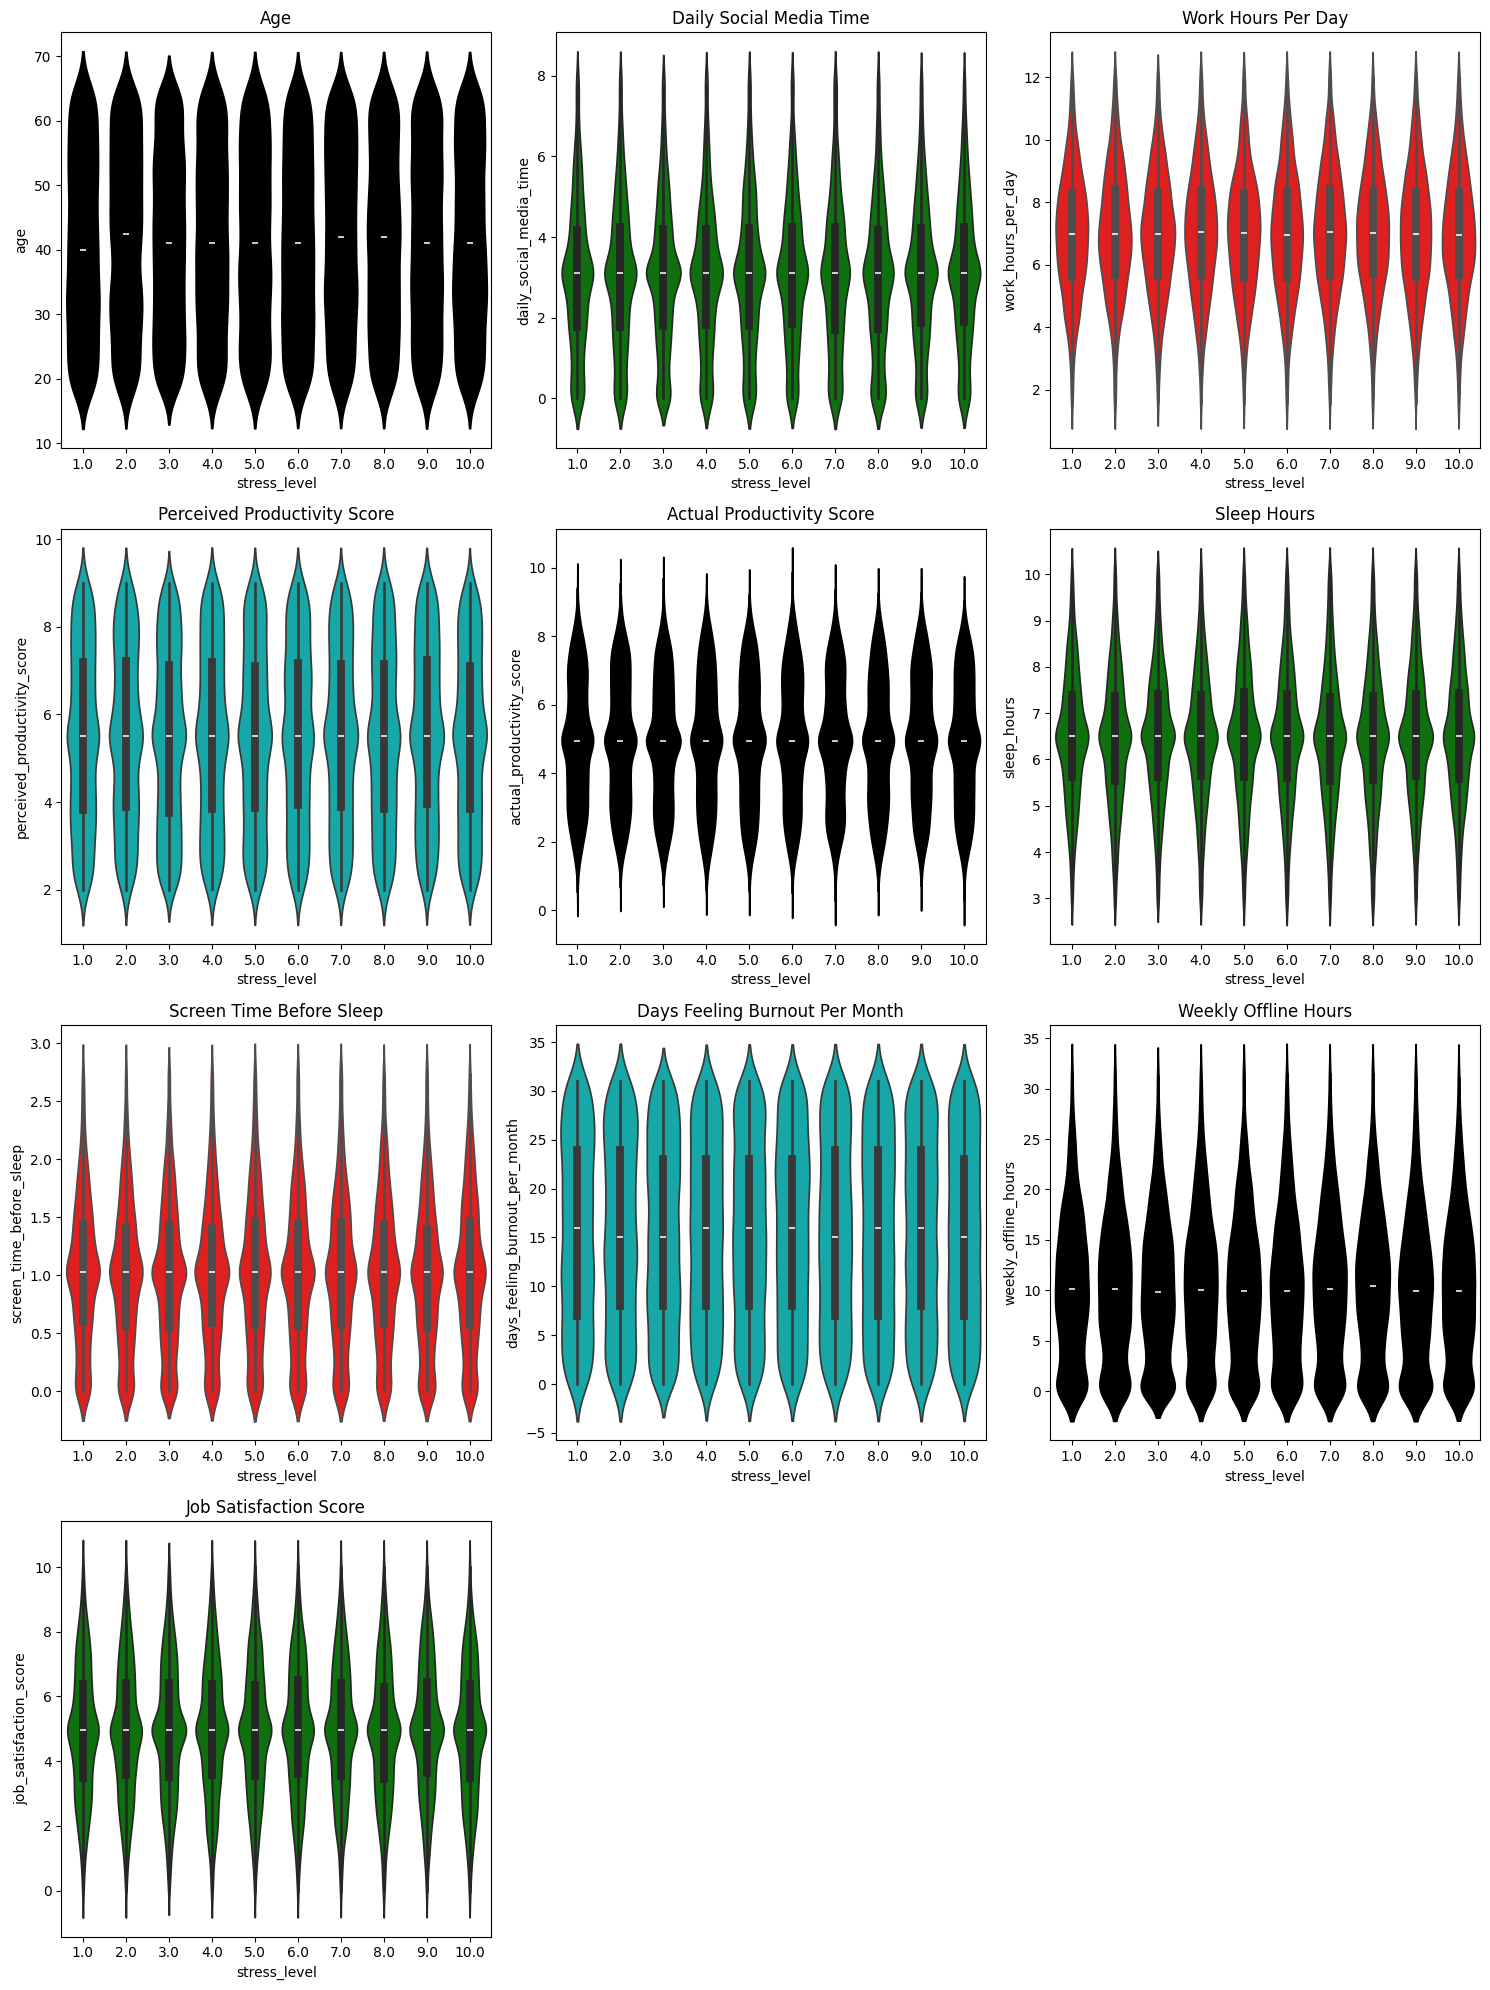

In [249]:
# plotting count of each variable vs target
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    plt.title(" ".join(col.split('_')).title())
    sns.violinplot(y=col, x='stress_level', data=df, color=colors[i % len(colors)])
plt.tight_layout()
plt.show()

#### Categorical Features

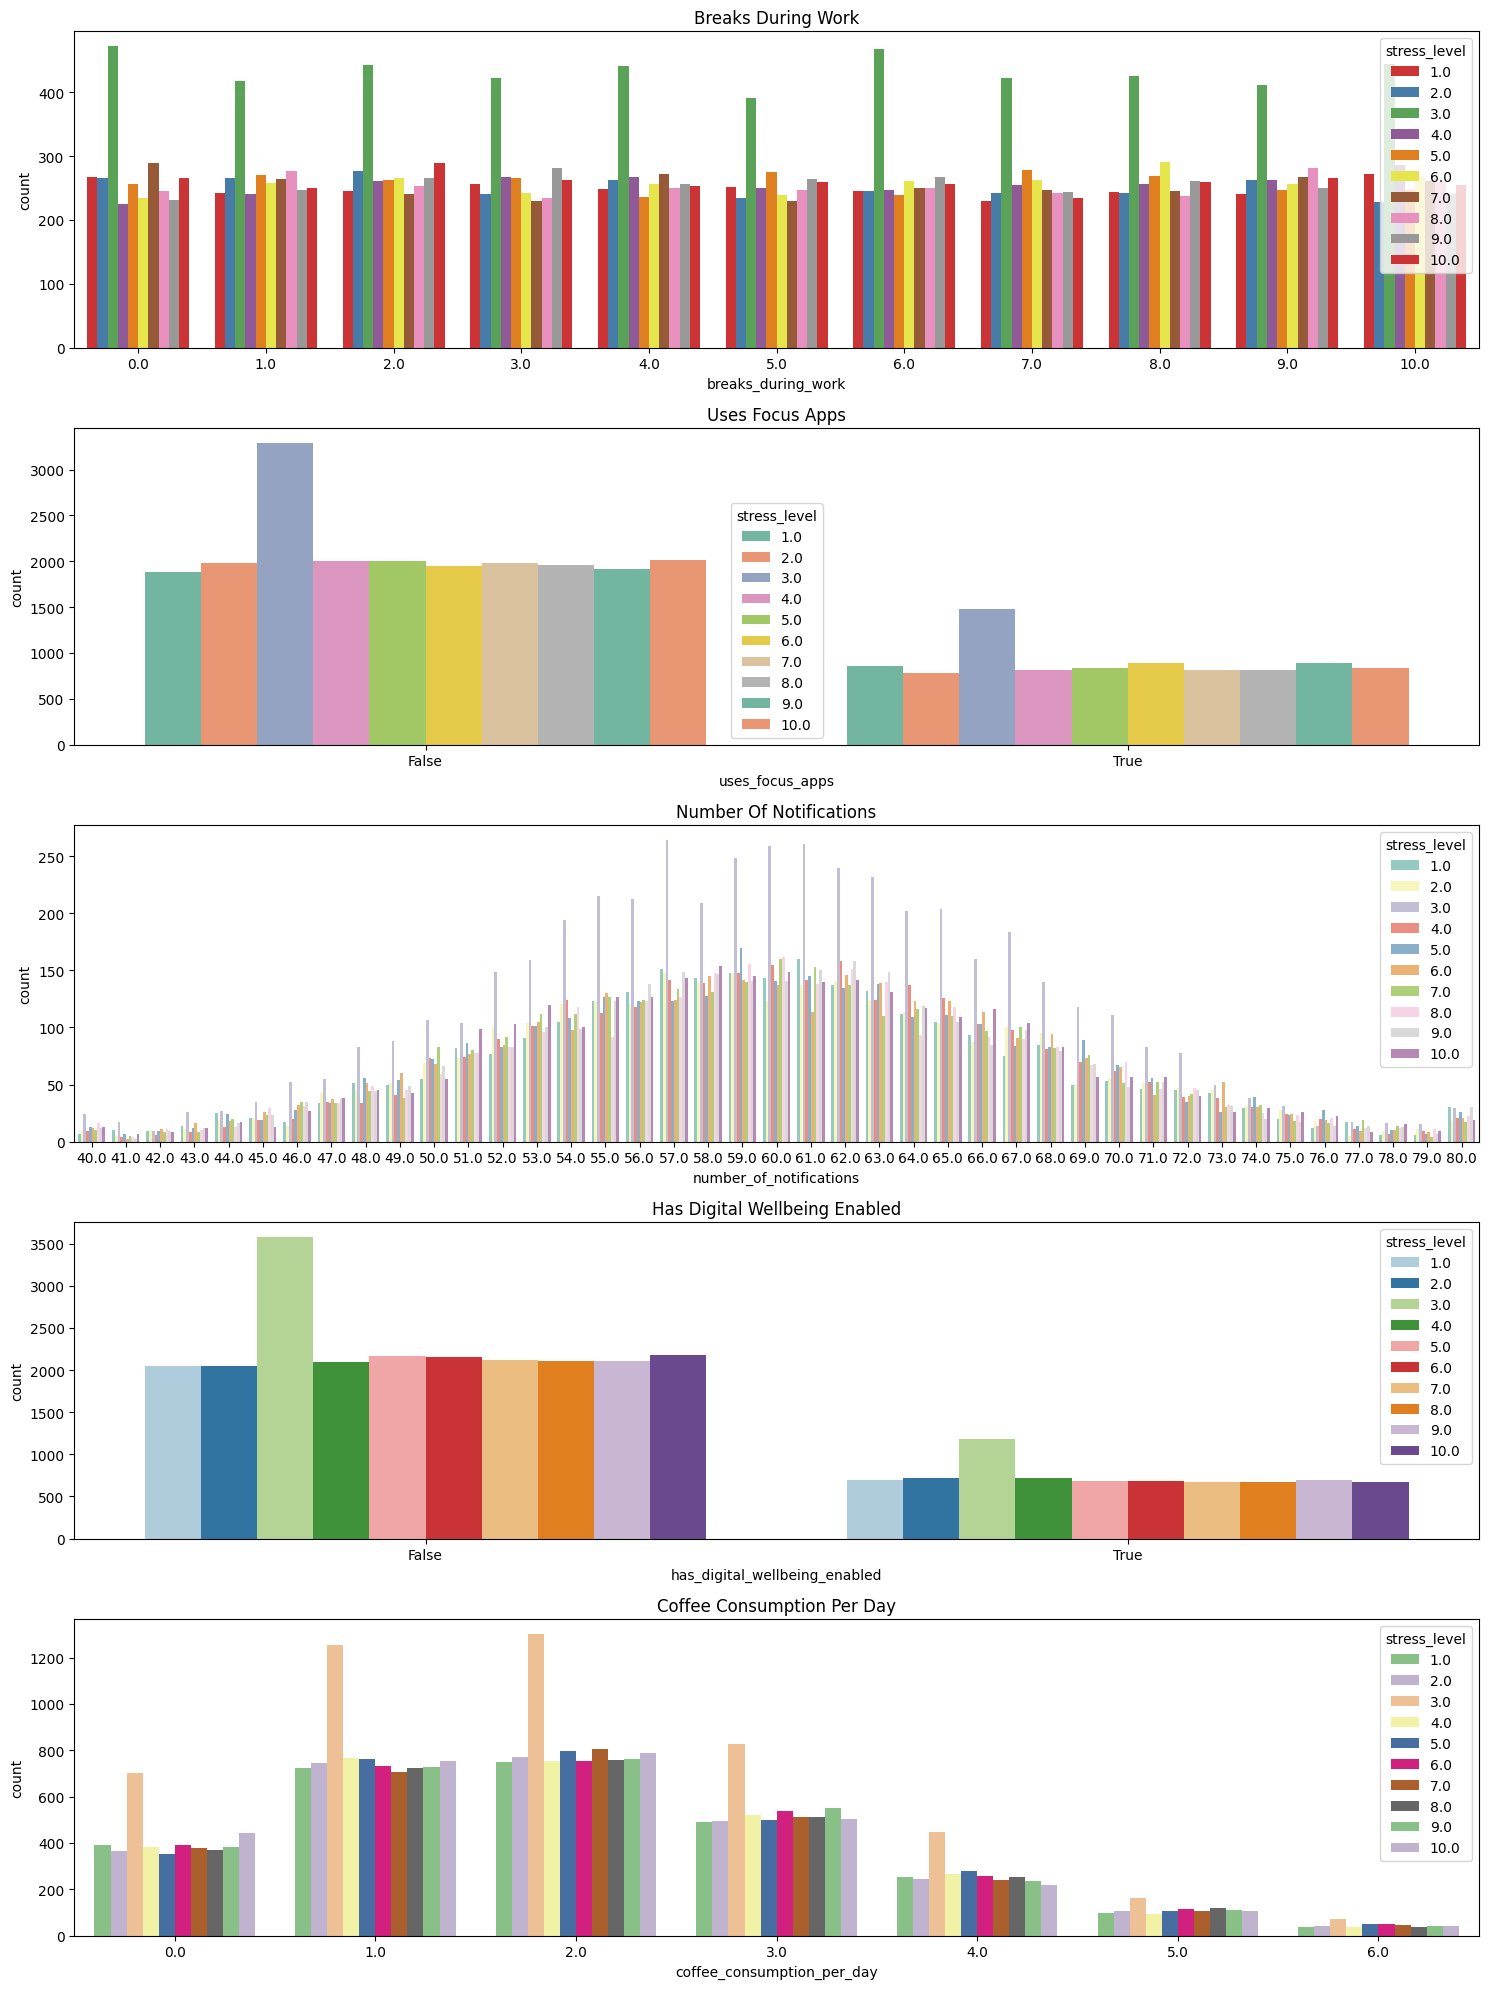

In [250]:
# plotting violin plots of each feature vs target to see the data distribution against target for each feature 
palette = ['Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Pastel1', 'Pastel2', 'Dark2']
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(5, 1, i+1)
    plt.title(" ".join(col.split('_')).title())
    sns.countplot(data=df, x=col, hue='stress_level', palette=palette[i % len(palette)])
plt.tight_layout()
plt.show()

#### Multivariate Analysis

We plot the heatmap for the dataset to see the correlation between features

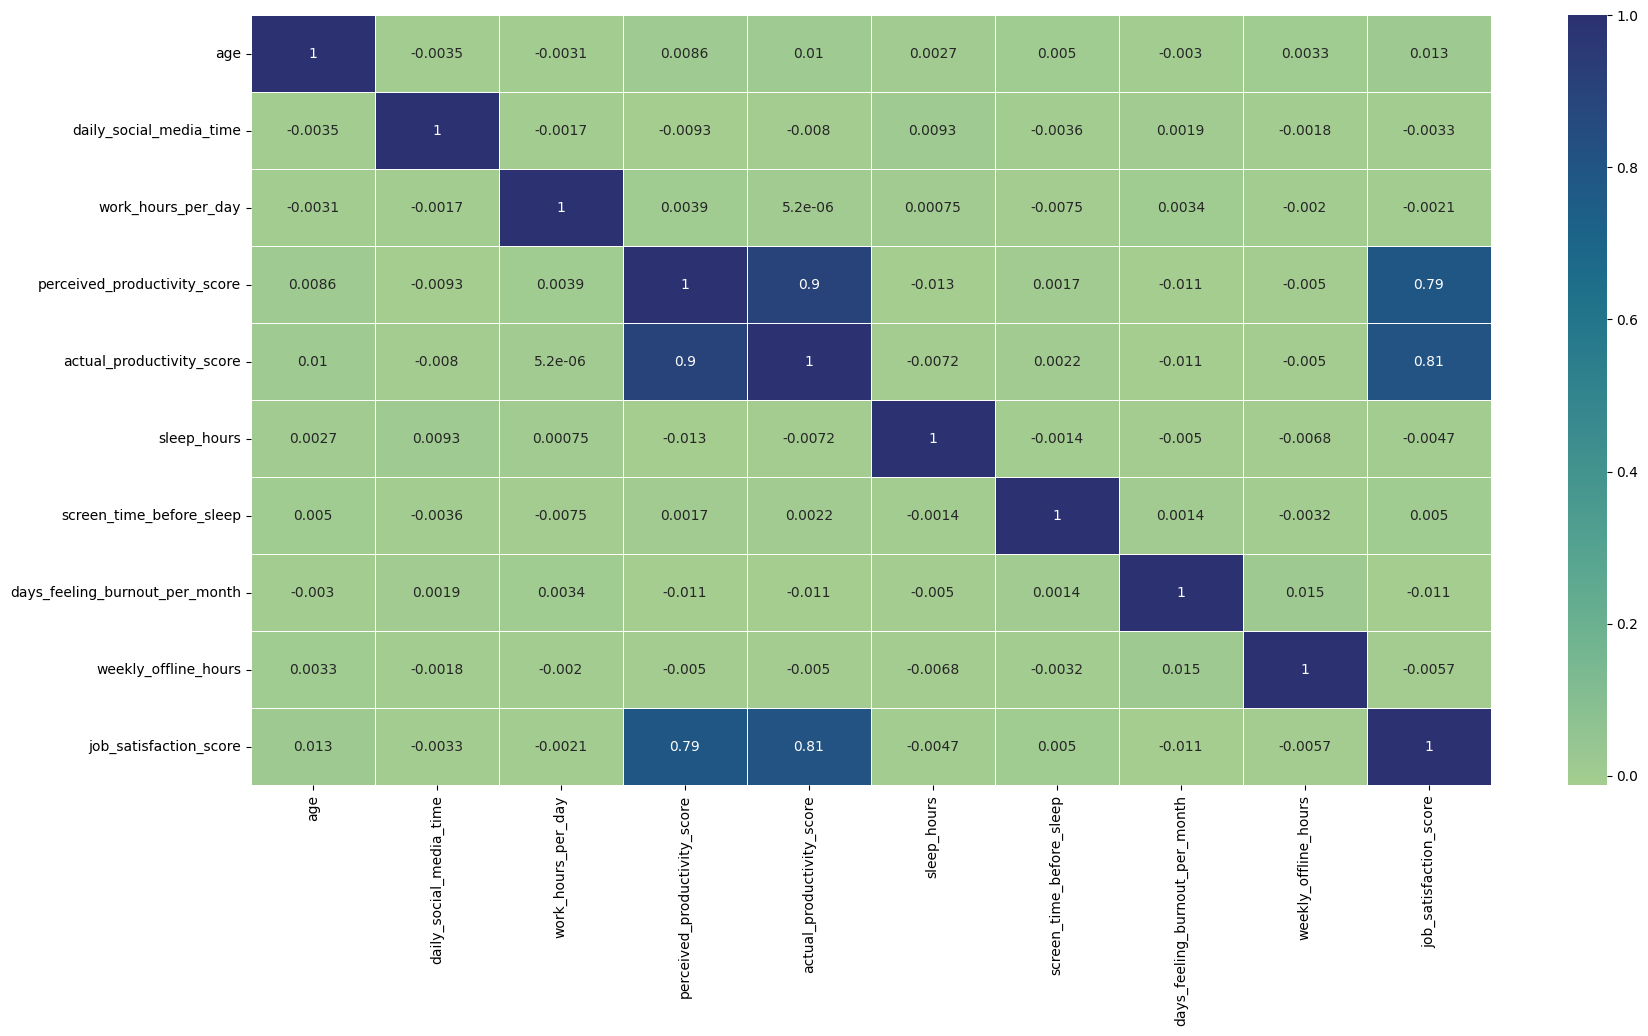

In [251]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[num_cols].corr(), annot=True, linewidth=0.5, cmap='crest')
plt.show()

It is seen that correlation between:<br>
perceived_productivity_score and actual_productivity_score ≈ 0.9 → very high correlation<br>
perceived_productivity_score and job_satisfaction_score ≈ 0.79<br>
actual_productivity_score and job_satisfaction_score ≈ 0.81<br>
We can keep only one among perceived_productivity_score, actual_productivity_score, job_satisfaction_score.<br>
<br>
According to feature importance scores:<br>
perceived_productivity_score      0.079735<br>
job_satisfaction_score            0.077128<br>
actual_productivity_score         0.075856)<br>
<br>
We are selecting perceived_productivity_score and removing the other two. 

In [252]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56.0,Male,Unemployed,4.180940,Facebook,61.0,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8.0,False,False,4.0,11.0,21.927072,6.336688
1,46.0,Male,Health,3.249603,Twitter,59.0,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7.0,True,True,2.0,25.0,0.000000,3.412427
2,32.0,Male,Finance,3.113418,Twitter,57.0,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0.0,True,False,3.0,17.0,10.322044,2.474944
3,60.0,Female,Unemployed,3.113418,Facebook,59.0,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1.0,False,False,0.0,4.0,23.876616,1.733670
4,25.0,Male,IT,3.113418,Telegram,66.0,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1.0,False,True,1.0,30.0,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34.0,Female,Health,1.877297,Facebook,59.0,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9.0,False,False,4.0,5.0,21.776927,4.964901
29996,39.0,Male,Health,4.437784,Instagram,46.0,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3.0,False,False,1.0,29.0,4.111370,6.155613
29997,42.0,Male,Education,7.852210,TikTok,64.0,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10.0,False,False,1.0,2.0,1.888315,6.285237
29998,20.0,Female,Education,3.796634,Instagram,56.0,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1.0,False,False,2.0,9.0,12.511871,7.854711


In [253]:
df = df.drop(columns=['actual_productivity_score', 'job_satisfaction_score'])
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours
0,56.0,Male,Unemployed,4.180940,Facebook,61.0,6.753558,8.040464,4.0,5.116546,0.419102,8.0,False,False,4.0,11.0,21.927072
1,46.0,Male,Health,3.249603,Twitter,59.0,9.169296,5.063368,7.0,5.103897,0.671519,7.0,True,True,2.0,25.0,0.000000
2,32.0,Male,Finance,3.113418,Twitter,57.0,7.910952,3.861762,4.0,8.583222,0.624378,0.0,True,False,3.0,17.0,10.322044
3,60.0,Female,Unemployed,3.113418,Facebook,59.0,6.355027,2.916331,6.0,6.052984,1.204540,1.0,False,False,0.0,4.0,23.876616
4,25.0,Male,IT,3.113418,Telegram,66.0,6.214096,8.868753,7.0,5.405706,1.876254,1.0,False,True,1.0,30.0,10.653519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34.0,Female,Health,1.877297,Facebook,59.0,10.226358,3.348512,8.0,5.480462,1.412655,9.0,False,False,4.0,5.0,21.776927
29996,39.0,Male,Health,4.437784,Instagram,46.0,4.692862,8.133213,8.0,3.045393,0.148936,3.0,False,False,1.0,29.0,4.111370
29997,42.0,Male,Education,7.852210,TikTok,64.0,10.915036,8.611005,5.0,5.491520,1.224296,10.0,False,False,1.0,2.0,1.888315
29998,20.0,Female,Education,3.796634,Instagram,56.0,6.937410,7.767076,8.0,6.816069,0.234483,1.0,False,False,2.0,9.0,12.511871


In [254]:
# FIXME: One hot encoding???
from sklearn.preprocessing import LabelEncoder
cat_cols = ['gender', 'job_type', 'social_platform_preference']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours
0,56.0,1,5,4.180940,0,61.0,6.753558,8.040464,4.0,5.116546,0.419102,8.0,False,False,4.0,11.0,21.927072
1,46.0,1,2,3.249603,4,59.0,9.169296,5.063368,7.0,5.103897,0.671519,7.0,True,True,2.0,25.0,0.000000
2,32.0,1,1,3.113418,4,57.0,7.910952,3.861762,4.0,8.583222,0.624378,0.0,True,False,3.0,17.0,10.322044
3,60.0,0,5,3.113418,0,59.0,6.355027,2.916331,6.0,6.052984,1.204540,1.0,False,False,0.0,4.0,23.876616
4,25.0,1,3,3.113418,2,66.0,6.214096,8.868753,7.0,5.405706,1.876254,1.0,False,True,1.0,30.0,10.653519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34.0,0,2,1.877297,0,59.0,10.226358,3.348512,8.0,5.480462,1.412655,9.0,False,False,4.0,5.0,21.776927
29996,39.0,1,2,4.437784,1,46.0,4.692862,8.133213,8.0,3.045393,0.148936,3.0,False,False,1.0,29.0,4.111370
29997,42.0,1,0,7.852210,3,64.0,10.915036,8.611005,5.0,5.491520,1.224296,10.0,False,False,1.0,2.0,1.888315
29998,20.0,0,0,3.796634,1,56.0,6.937410,7.767076,8.0,6.816069,0.234483,1.0,False,False,2.0,9.0,12.511871


In [255]:
# skew
df.skew().sort_values()

work_hours_per_day               -0.018802
perceived_productivity_score     -0.011469
days_feeling_burnout_per_month   -0.007784
social_platform_preference       -0.007322
job_type                          0.001724
sleep_hours                       0.004183
breaks_during_work                0.006698
age                               0.015305
number_of_notifications           0.084381
stress_level                      0.125610
daily_social_media_time           0.270160
screen_time_before_sleep          0.284237
weekly_offline_hours              0.392190
gender                            0.399091
coffee_consumption_per_day        0.572749
uses_focus_apps                   0.869282
has_digital_wellbeing_enabled     1.175842
dtype: float64

In [256]:
# FIXME: uses_focus_apps is highly skewed!

In [257]:
# corr
num_cols = ['age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours']
df[num_cols].corr()['stress_level'].sort_values()

weekly_offline_hours             -0.001548
screen_time_before_sleep         -0.001292
number_of_notifications          -0.000458
coffee_consumption_per_day        0.001020
work_hours_per_day                0.001315
days_feeling_burnout_per_month    0.001512
daily_social_media_time           0.002498
breaks_during_work                0.002769
sleep_hours                       0.003044
perceived_productivity_score      0.004360
age                               0.004630
stress_level                      1.000000
Name: stress_level, dtype: float64

None of the features are correlated with the target

In [258]:
# standardization
# FIXME: One Hot encoding and standardization????????
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cols = ['age', 'daily_social_media_time', 'work_hours_per_day', 'perceived_productivity_score', 'sleep_hours', 'screen_time_before_sleep', 'days_feeling_burnout_per_month', 'weekly_offline_hours']
for col in num_cols:
    df[col] = sc.fit_transform(np.array(df[col]).reshape(-1, 1))
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours
0,1.049017,1,5,0.610949,0,61.0,-0.119901,1.285392,4.0,-0.988958,-0.967390,8.0,False,False,4.0,-0.492507,1.596507
1,0.326212,1,2,0.096479,4,59.0,1.092381,-0.227166,7.0,-0.997998,-0.564076,7.0,True,True,2.0,1.020549,-1.427672
2,-0.685715,1,1,0.021251,4,57.0,0.460910,-0.837660,4.0,1.488741,-0.639399,0.0,True,False,3.0,0.155946,-0.004057
3,1.338138,0,5,0.021251,0,59.0,-0.319895,-1.318001,6.0,-0.319667,0.287592,1.0,False,False,0.0,-1.249034,1.865388
4,-1.191679,1,3,0.021251,2,66.0,-0.390618,1.706217,7.0,-0.782289,1.360864,1.0,False,True,1.0,1.560925,0.041660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.541154,0,2,-0.661582,0,59.0,1.622844,-1.098424,8.0,-0.728860,0.620121,9.0,False,False,4.0,-1.140959,1.575799
29996,-0.179752,1,2,0.752830,1,46.0,-1.154014,1.332515,8.0,-2.469249,-1.399065,3.0,False,False,1.0,1.452850,-0.860632
29997,0.037090,1,0,2.638958,3,64.0,1.968441,1.575264,5.0,-0.720956,0.319159,10.0,False,False,1.0,-1.465185,-1.167236
29998,-1.553081,0,0,0.398659,1,56.0,-0.027639,1.146493,8.0,0.225723,-1.262378,1.0,False,False,2.0,-0.708657,0.297964


### Feature Selection/Extraction

In [259]:
X=df.drop('stress_level',axis=1)
y=df['stress_level']

In [260]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours
21753,-1.119398,1,1,-1.698601,3,65.0,1.791382,0.257729,-1.690133e+00,-0.382764,5.0,True,False,0.0,1.669001,0.242034
251,1.121297,0,0,1.624276,3,58.0,-0.294393,0.682626,3.501660e-01,-0.087883,2.0,False,True,0.0,-1.573260,0.019902
22941,1.265858,0,5,1.362872,4,63.0,-0.689623,-0.449355,-6.395498e-01,1.234277,7.0,False,True,1.0,0.696322,0.085609
618,-0.541154,1,5,0.021251,1,67.0,-1.457828,-0.568444,4.526152e-02,-0.953773,7.0,False,False,1.0,0.696322,1.077237
17090,1.338138,1,1,0.021251,1,51.0,0.913881,1.305569,4.433204e-01,0.371316,6.0,False,True,2.0,-0.168281,0.990190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,-1.408520,1,1,1.028733,4,70.0,1.123127,-0.178595,1.297666e+00,0.500670,2.0,False,True,3.0,1.344775,-1.198970
5390,-1.191679,0,0,1.065016,2,63.0,-0.107444,-1.635459,6.347978e-16,-0.168539,5.0,False,False,2.0,0.047870,0.826754
860,-1.408520,1,3,0.301498,3,66.0,0.323111,0.936911,5.363518e-01,-0.159825,7.0,False,False,3.0,-0.168281,-1.427672
15795,0.253931,1,3,-0.131099,0,62.0,-0.213557,-1.327866,-3.874399e-01,-1.071496,5.0,False,False,2.0,-1.249034,-0.041303


In [261]:
X_train.shape

(24000, 16)

Train Accuracy: 100.00%
Test Accuracy: 12.62%

Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.07      0.05      0.06       560
         2.0       0.09      0.06      0.07       577
         3.0       0.16      0.48      0.24       993
         4.0       0.09      0.05      0.07       549
         5.0       0.11      0.07      0.09       569
         6.0       0.09      0.06      0.07       572
         7.0       0.10      0.05      0.07       532
         8.0       0.10      0.05      0.06       534
         9.0       0.10      0.05      0.06       580
        10.0       0.10      0.06      0.08       534

    accuracy                           0.13      6000
   macro avg       0.10      0.10      0.09      6000
weighted avg       0.10      0.13      0.10      6000



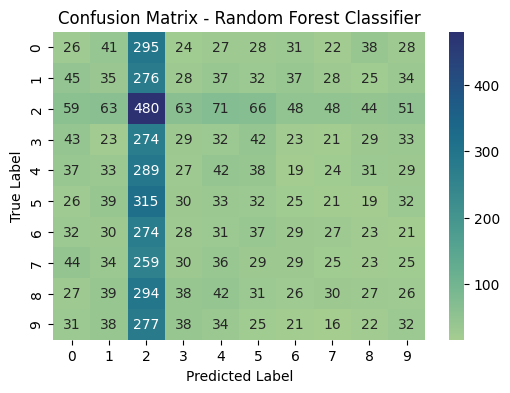

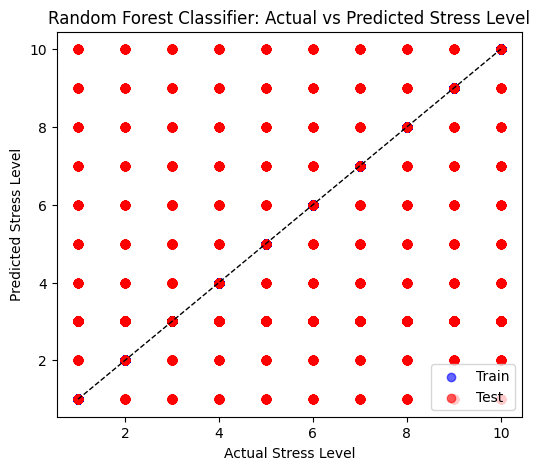

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use your selected features
X_train_r = X_train  # or X_train[final_features] if feature selection done
X_test_r = X_test

# Initialize and fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_r, y_train)

# Predict on train and test sets
y_train_pred = rf_model.predict(X_train_r)
y_test_pred = rf_model.predict(X_test_r)

# Compute accuracy
train_acc = accuracy_score(y_train, y_train_pred) * 100
test_acc = accuracy_score(y_test, y_test_pred) * 100

print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")

# Detailed classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='crest')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optional: visualize predicted vs actual for ordinal clarity
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, alpha=0.6, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=1)
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Random Forest Classifier: Actual vs Predicted Stress Level")
plt.legend()
plt.show()


Import necessary libraries needed for [erforming Logistic regression, Bayes classifers

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score,classification_report

### Logistic Regression


In [264]:
lr = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("classification_report:", classification_report(y_test, y_pred_lr))

/home/aadiuntu/ML_Project/Student_Stress_Level_Prediction_ML_Project_/.venv2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.1655
classification_report:               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       560
         2.0       0.00      0.00      0.00       577
         3.0       0.17      1.00      0.28       993
         4.0       0.00      0.00      0.00       549
         5.0       0.00      0.00      0.00       569
         6.0       0.00      0.00      0.00       572
         7.0       0.00      0.00      0.00       532
         8.0       0.00      0.00      0.00       534
         9.0       0.00      0.00      0.00       580
        10.0       0.00      0.00      0.00       534

    accuracy                           0.17      6000
   macro avg       0.02      0.10      0.03      6000
weighted avg       0.03      0.17      0.05      6000



/home/aadiuntu/ML_Project/Student_Stress_Level_Prediction_ML_Project_/.venv2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/aadiuntu/ML_Project/Student_Stress_Level_Prediction_ML_Project_/.venv2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/aadiuntu/ML_Project/Student_Stress_Level_Prediction_ML_Project_/.venv2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

### GaussianNB


In [265]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("classification_report:",classification_report(y_test, y_pred_gnb))

GaussianNB Accuracy: 0.1655
classification_report:               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       560
         2.0       0.00      0.00      0.00       577
         3.0       0.17      1.00      0.28       993
         4.0       0.00      0.00      0.00       549
         5.0       0.00      0.00      0.00       569
         6.0       0.15      0.00      0.01       572
         7.0       0.00      0.00      0.00       532
         8.0       0.00      0.00      0.00       534
         9.0       0.00      0.00      0.00       580
        10.0       0.00      0.00      0.00       534

    accuracy                           0.17      6000
   macro avg       0.03      0.10      0.03      6000
weighted avg       0.04      0.17      0.05      6000



/home/aadiuntu/ML_Project/Student_Stress_Level_Prediction_ML_Project_/.venv2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/aadiuntu/ML_Project/Student_Stress_Level_Prediction_ML_Project_/.venv2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/aadiuntu/ML_Project/Student_Stress_Level_Prediction_ML_Project_/.venv2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

### CategoricalNB

In [266]:
# Convert to numeric numpy arrays
X_train_np = X_train.to_numpy().astype(int)  # ensure integer type
X_test_np = X_test.to_numpy().astype(int)

#CAtegoricalNB cannot take negative input
X_train_cnb = X_train_np - X_train_np.min(axis=0)
X_test_cnb = X_test_np - X_train_np.min(axis=0) 
#for each element in X_test_cnb, it takes the min of value in the test set,the max value seen in x_train for that feature
X_test_cnb = np.minimum(X_test_cnb, X_train_cnb.max(axis=0))


cnb = CategoricalNB()
cnb.fit(X_train_cnb, y_train)
y_pred_cnb = cnb.predict(X_test_cnb)
print("CategoricalNB Accuracy:", accuracy_score(y_test, y_pred_cnb))
print("classification_report:",classification_report(y_test, y_pred_cnb))


CategoricalNB Accuracy: 0.1605
classification_report:               precision    recall  f1-score   support

         1.0       0.06      0.00      0.01       560
         2.0       0.10      0.01      0.02       577
         3.0       0.17      0.90      0.29       993
         4.0       0.11      0.01      0.02       549
         5.0       0.10      0.02      0.04       569
         6.0       0.11      0.02      0.04       572
         7.0       0.07      0.01      0.02       532
         8.0       0.17      0.01      0.02       534
         9.0       0.09      0.01      0.01       580
        10.0       0.08      0.02      0.04       534

    accuracy                           0.16      6000
   macro avg       0.11      0.10      0.05      6000
weighted avg       0.11      0.16      0.07      6000

